In [4]:
import os 
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
from drawdata import draw_scatter
draw_scatter()

In [74]:
#All x for a and b in one, and ALl y for a and b on the other list
filename = "data.csv"
file = pd.read_csv(filename)
#[x1, x2]
Ax = np.around(file.loc[lambda file: file['z'] == 'a', lambda file: ['x']],2)
Bx = np.around(file.loc[lambda file: file['z'] == 'b', lambda file: ['x']],2)
#[y1, y2]
Ay = np.around(file.loc[lambda file: file['z'] == 'a', lambda file: ['y']],2)
By = np.around(file.loc[lambda file: file['z'] == 'b', lambda file: ['y']],2)


#remove the indexes
Ax = Ax.reset_index(drop=True)
Bx = Bx.reset_index(drop=True)
Ay = Ay.reset_index(drop=True)
By = By.reset_index(drop=True)


#make number of features equal(remove NaN)!
ln1 = len(Ax)
ln2 = len(Bx)
n = abs(ln1 - ln2)

if ln1 > ln2:
    Ax.drop(Ax.tail(n).index,inplace = True)
    Ay.drop(Ax.tail(n).index,inplace = True)
elif ln2 > ln1:
    Bx.drop(Bx.tail(n).index,inplace = True)
    By.drop(By.tail(n).index,inplace = True)

    

#merge for each
dat1 = (pd.concat((Ax, Ay), axis=1)) #1
dat2 = (pd.concat((Bx, By), axis=1)) #0


test = [dat1, dat2]


dat1['y1'] = 1
dat2['y1'] = 1




#A == 1
#B == 0


#desired_values
y_true = np.array([1, 0])


#sc

# feature1 = (pd.concat((self.theta1*self.test[0].iloc[:,0], self.theta1*self.test[1].iloc[:,0]), axis=1)) #1
# feature2 = (pd.concat((self.theta1*self.test[0].iloc[:,1], self.theta1*self.test[1].iloc[:,1]), axis=1)) #0


print(test[1].iloc[:,0].max())


# print(test)


2
661.62


In [123]:
training_params = {
    "lr": 0.0015,
    "tol": 0.0,
    "epoch": 10
}

# training_params = {
#     "lr": 0.002,
#     "tol": 0.0,
#     "epoch": 500
# }


In [134]:
class LogReg:
    def __init__(self, test, y_true, **params):
        self.theta1 =  np.random.rand()
        self.theta2 =  np.random.rand()
        self.bias = np.random.rand()
        self.test = test
        self.y_true = y_true
        self.lr = params.get("lr")
        self.tol = params.get("tol")
        self.epoch = params.get("epoch")
        
    def grad_negative_theta_0(self):
        z = self.theta1*test[1].iloc[:,0] + self.theta2*test[1].iloc[:,1] + self.bias
        return 1. - 1./(np.exp(z) + 1)
        
  
    #1
    def grad_negative_theta_1(self):
        x1 = self.test[1].iloc[:,0]   
        z = self.theta1*test[1].iloc[:,0] + self.theta2*test[1].iloc[:,1]

        
        return x1 - x1/(np.exp(z) + 1)
    #2
    def grad_negative_theta_2(self):
        x2 =  self.test[1].iloc[:,1] 
        z = self.theta1*test[1].iloc[:,0] + self.theta2*test[1].iloc[:,1]
        return x2 - x2/(np.exp(z) + 1)
    
    def grad_positive_theta_0(self):
        z = self.theta1*test[0].iloc[:,0] + self.theta2*test[0].iloc[:,1] + self.bias
        return -1./(np.exp(z) + 1)
    #a
    def grad_positive_theta_1(self):
        x1 = self.test[0].iloc[:,0]
        z = self.theta1*test[0].iloc[:,0] + self.theta2*test[0].iloc[:,1]

        return -x1/(np.exp(z) + 1)
    #a
    def grad_positive_theta_2(self):
        
        x2 = self.test[0].iloc[:,1]
        z = self.theta1*test[0].iloc[:,0] + self.theta2*test[0].iloc[:,1]

        return -x2/(np.exp(z) + 1)
    
#     def gradient(self):
#         feature1 = (pd.concat((self.test[0].iloc[:,0], self.test[1].iloc[:,0]), axis=1)) #1st feature
#         feature2 = (pd.concat((self.test[0].iloc[:,1], self.test[1].iloc[:,1]), axis=1)) #2nd feature
        
#         feature1 = np.array(feature1)
#         feature2 = np.array(feature2)

#         e = np.exp(1)
        
                        
        
#         theta1_grad = np.mean((-np.power(e, self.theta1*feature1 +
#             self.theta2*feature2)/(1+np.power(e,
#           self.theta1*feature1 + self.theta2*feature2))))
        
#         theta2_grad = np.mean(1/(1+np.power(e,
#           self.theta1*feature1 + self.theta2*feature2)))
                              
        
                              
        
#         theta2_grad = np.mean((-feature2/(np.power(e, self.theta1*feature1 +
#             self.theta2*feature2) + 1)))
        
        
    
#         return theta1_grad, theta2_grad
    
    
    def binary_cross_entropy(self, sigmoid):  
        # from loss_vector = - self.y_true * np.log2(sigmoid) - (1 - self.y_true) * np.log2(1 - sigmoid) to :
        loss_vector = - np.log2(sigmoid[0]) - np.log2(1 - sigmoid[1])
        cost = np.mean(loss_vector)
        return cost
    
    #/fixed
    def sigmoid(self):
        
        hypothesis1 = self.theta1*test[0].iloc[:,0]  + self.theta2*test[0].iloc[:,1]  + self.bias
        hypothesis2 = self.theta1*test[1].iloc[:,0] + self.theta2*test[1].iloc[:,1] +  self.bias 
        
        #hypothesis array for test[0] and test[1]
        hypothesis = [hypothesis1,hypothesis2]
      
        
        return 1./(1. + np.exp(hypothesis))
    

                              
    def fit(self):
        theta1_ll = list()
        theta2_ll = list()
        cost_ll = list()
        deltax_ll = list()
        bias = list()
        for it in range(self.epoch):
            hypothesis = self.sigmoid()
            cost_difference = 0
            x_difference = 0
            cost = self.binary_cross_entropy(hypothesis)
            cost_ll.append(cost)
            if cost <= self.tol + 1:
                print(f"Convergence reached at epoch {it}. Cost: {cost}")
                return
            else:
                bias.append(self.grad_negative_theta_0())
                bias.append(self.grad_positive_theta_0())
                theta2_ll.append(self.grad_positive_theta_1()) #b
                theta1_ll.append(self.grad_positive_theta_1()) #a
                theta2_ll.append(self.grad_negative_theta_2()) #b
                theta1_ll.append(self.grad_positive_theta_2()) 
                self.theta1 = (self.theta1 - np.mean(theta1_ll) * self.lr)
                self.theta2 = (self.theta2 - np.mean(theta2_ll) * self.lr)
                
                self.bias = (self.bias - np.mean(bias) * self.lr)
                
                if it > 0:
                    print(f"Epoch: {it}: Cost: {cost}, Theta1: {self.theta1}, Theta2: {self.theta2} ")
                
    def predict(self, x1, x2):
        hypothesis = x1*self.theta1 + x2*self.theta2 + self.bias 
        e = np.exp(1)      
        return np.around(1./(1. + np.exp(hypothesis)), 2)

    

        
    
    

    
        
        

In [138]:
ll = LogReg(test, y_true, **training_params)
ll.fit()


Epoch: 1: Cost: 326.32811994525775, Theta1: 0.35602232896479635, Theta2: 0.2376397454691437 
Epoch: 2: Cost: 252.88420687837964, Theta1: 0.35602232896479635, Theta2: 0.10049396960707474 
Epoch: 3: Cost: 179.44029381150148, Theta1: 0.35602232896479635, Theta2: -0.03665180625499423 
Epoch: 4: Cost: 105.99638074462331, Theta1: 0.35602232896479635, Theta2: -0.1737975821170632 
Epoch: 5: Cost: 34.71887981053771, Theta1: 0.36563151822729373, Theta2: -0.30816060317888283 
Epoch: 6: Cost: 1.0078208943440747, Theta1: 0.43038354277534263, Theta2: -0.4212171754232443 
Convergence reached at epoch 7. Cost: 6.702059593279369e-05


In [139]:
ll.predict(300, 100)

0.0

In [140]:
# def sigmoid(x):
#     e = np.exp(1)
#     return 1./(1. + np.power(e,-x))

# def model(x):
#     theta = np.random.rand()
#     print(theta)
#     return x*theta

# def binary_cross_entropy(pred, y_true):
#     loss_vector = - y_true * np.log2( pred ) - (1 - y_true) * np.log2( 1 - pred )
#     cost = np.mean(loss_vector)
#     return cost

1.2126547323690187


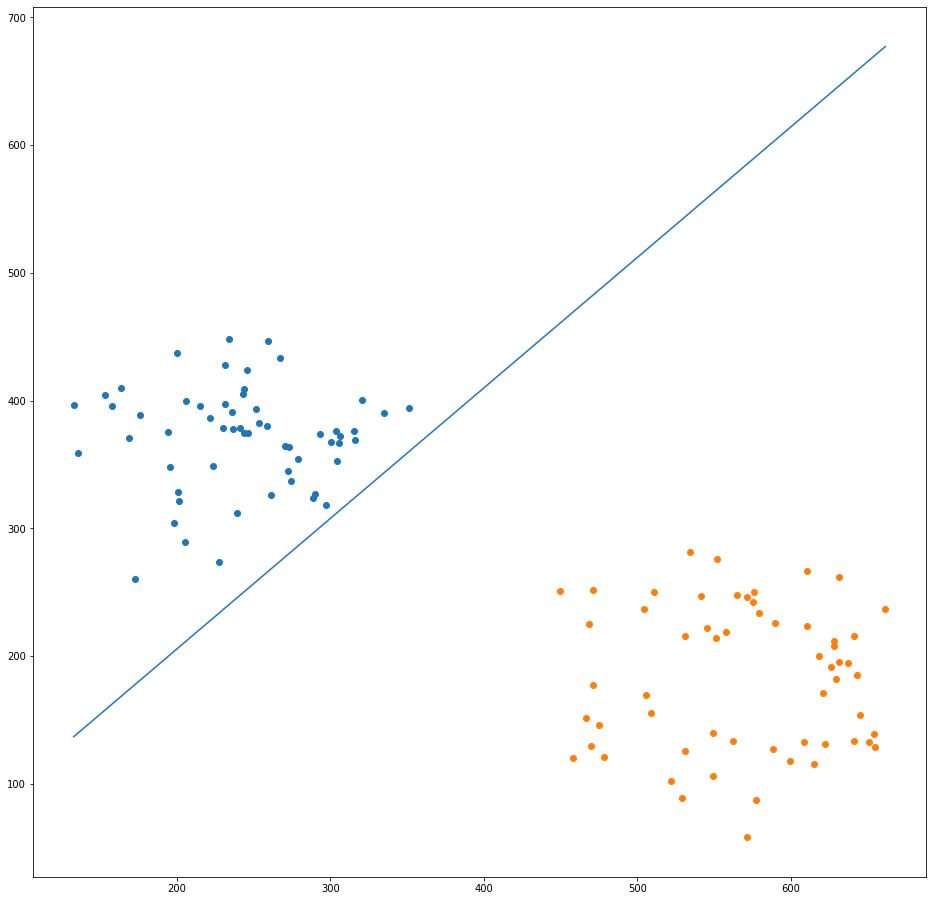

In [141]:
fig, axes = plt.subplots(1,1, figsize=(16, 16))
axes.scatter(test[0].iloc[:,0], test[0].iloc[:,1])
axes.scatter(test[1].iloc[:,0], test[1].iloc[:,1])

x_min, x_max = test[0].iloc[:,0].min(), test[1].iloc[:,0].max()
line_x = np.linspace(x_min, x_max, len((test[0].iloc[:,0]) + len((test[1].iloc[:,0]))))

c = - ll.bias / ll.theta2
m = - ll.theta1 / ll.theta2
print(c)

axes.plot(line_x, m * line_x + c )

In [ ]:
#disadvantages:
  #1 no shuffle - grad not exact 
  #2 not organized
  # 3 can't do gradient checking dont know what is delta x